<a href="https://colab.research.google.com/github/teerasitk/01205415/blob/main/TradeSimulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install
1. yfinance for accessing yahoo finance data
2. tensortrade for trade simulation

In [ ]:
!pip install yfinance
!pip install tensortrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.6/32.6 MB 8.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.1/48.1 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 22.7 MB/s eta 0:00:00
  Created wheel for tensortrade: filename=tensortrade-1.0.3-py3-none-any.whl size=134844 sha256=b669285755b7ff505fffbb2ea662b1c15a0160ca85f4c90649d7370a89a5c5c8
  Stored in directory: /root/.cache/pip/wheels/7f/a7/75/792c00b8bcd136448db22cd2ca4b4bf0856a58a7dea881bcfc
Successfully built tensortrade


# import Python libraries

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensortrade.env.default as default

from tensortrade.data.cdd import CryptoDataDownload
from tensortrade.feed.core import Stream, DataFeed, NameSpace
from tensortrade.oms.instruments import Instrument
from tensortrade.oms.wallets import Wallet, Portfolio
from tensortrade.oms.exchanges import Exchange, ExchangeOptions
from tensortrade.oms.services.execution.simulated import execute_order
from tensortrade.env.default.renderers import PlotlyTradingChart, FileLogger

# Download AOT from 2010 to 2023

In [ ]:
data_frame = yf.download("AOT.BK", "2015-01-01", "2023-12-31")
data_frame.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-05,28.0,28.000000,27.200001,27.299999,24.920395,24970000
2015-01-06,26.9,27.400000,26.700001,27.200001,24.829111,24309000
2015-01-07,27.5,28.299999,27.500000,28.299999,25.833229,20682000
2015-01-08,28.9,29.000000,28.600000,28.900000,26.380932,23039000
2015-01-09,29.1,29.299999,28.900000,29.100000,26.563498,34221000


# Build symbol
1. THB for Thai Baht
2. AOT for Airports of Thailand

In [ ]:
THB = Instrument(symbol="THB", precision=2, name="Thai Baht")
AOT = Instrument(symbol="AOT", precision=2, name="Airports of Thailand")

In [ ]:
set_market = Exchange("set", service=execute_order,
                      options=ExchangeOptions(commission=0.0001))
# build exchange market
# commission is to 0.01%
buy_sell_prices = data_frame['Close'].tolist()
stream_prices = Stream.source(buy_sell_prices, dtype='float').rename("THB-AOT")
set_market = set_market(stream_prices)

# Build feature from historical prices

In [ ]:
hist_len = 90 # look back 1 quarter
close_price = data_frame["Close"]
high_price = data_frame["High"].tolist()
low_price = data_frame["Low"].tolist()
streams = [Stream.source(close_price.shift(c)).rename(f"lag{c:02d}") for c in range(1, hist_len+1)]
streams.append(Stream.source(high_price,
                         dtype="float").rename("max_of_day"))
streams.append(Stream.source(low_price,
                         dtype="float").rename("min_of_day"))

# Data feed from historical prices

In [ ]:
feed = DataFeed(streams)
feed.next()

{'lag01': nan,
 'lag02': nan,
 'lag03': nan,
 'lag04': nan,
 'lag05': nan,
 'lag06': nan,
 'lag07': nan,
 'lag08': nan,
 'lag09': nan,
 'lag10': nan,
 'lag11': nan,
 'lag12': nan,
 'lag13': nan,
 'lag14': nan,
 'lag15': nan,
 'lag16': nan,
 'lag17': nan,
 'lag18': nan,
 'lag19': nan,
 'lag20': nan,
 'lag21': nan,
 'lag22': nan,
 'lag23': nan,
 'lag24': nan,
 'lag25': nan,
 'lag26': nan,
 'lag27': nan,
 'lag28': nan,
 'lag29': nan,
 'lag30': nan,
 'lag31': nan,
 'lag32': nan,
 'lag33': nan,
 'lag34': nan,
 'lag35': nan,
 'lag36': nan,
 'lag37': nan,
 'lag38': nan,
 'lag39': nan,
 'lag40': nan,
 'lag41': nan,
 'lag42': nan,
 'lag43': nan,
 'lag44': nan,
 'lag45': nan,
 'lag46': nan,
 'lag47': nan,
 'lag48': nan,
 'lag49': nan,
 'lag50': nan,
 'lag51': nan,
 'lag52': nan,
 'lag53': nan,
 'lag54': nan,
 'lag55': nan,
 'lag56': nan,
 'lag57': nan,
 'lag58': nan,
 'lag59': nan,
 'lag60': nan,
 'lag61': nan,
 'lag62': nan,
 'lag63': nan,
 'lag64': nan,
 'lag65': nan,
 'lag66': nan,
 'lag67': 

In [ ]:
feed.next()

{'lag01': 27.299999237060547,
 'lag02': nan,
 'lag03': nan,
 'lag04': nan,
 'lag05': nan,
 'lag06': nan,
 'lag07': nan,
 'lag08': nan,
 'lag09': nan,
 'lag10': nan,
 'lag11': nan,
 'lag12': nan,
 'lag13': nan,
 'lag14': nan,
 'lag15': nan,
 'lag16': nan,
 'lag17': nan,
 'lag18': nan,
 'lag19': nan,
 'lag20': nan,
 'lag21': nan,
 'lag22': nan,
 'lag23': nan,
 'lag24': nan,
 'lag25': nan,
 'lag26': nan,
 'lag27': nan,
 'lag28': nan,
 'lag29': nan,
 'lag30': nan,
 'lag31': nan,
 'lag32': nan,
 'lag33': nan,
 'lag34': nan,
 'lag35': nan,
 'lag36': nan,
 'lag37': nan,
 'lag38': nan,
 'lag39': nan,
 'lag40': nan,
 'lag41': nan,
 'lag42': nan,
 'lag43': nan,
 'lag44': nan,
 'lag45': nan,
 'lag46': nan,
 'lag47': nan,
 'lag48': nan,
 'lag49': nan,
 'lag50': nan,
 'lag51': nan,
 'lag52': nan,
 'lag53': nan,
 'lag54': nan,
 'lag55': nan,
 'lag56': nan,
 'lag57': nan,
 'lag58': nan,
 'lag59': nan,
 'lag60': nan,
 'lag61': nan,
 'lag62': nan,
 'lag63': nan,
 'lag64': nan,
 'lag65': nan,
 'lag66': 

# Initialize portfolio with 1M THB and 0 Shares of AOT

In [ ]:
portfolio = Portfolio(THB, [Wallet(set_market, 1_000_000 * THB),
                            Wallet(set_market, 0 * AOT)])

In [ ]:
portfolio.balances

[1000000.00 THB, 0.00 AOT]

# Build Trading Environment

In [ ]:
env = default.create(
        portfolio=portfolio, # start with our portfolio
        action_scheme=default.actions.SimpleOrders(trade_sizes=[1]), # all in or out
        reward_scheme=default.rewards.SimpleProfit(), # simple profit (to be used later)
        feed=feed, # data feed for historical price
        window_size=1, # historical data that we need
        min_periods=hist_len # starting trading location
        )


# Build a trading strategies
Here, we buy if hist_len average close price is lower than maximum price of the day and sell if the his_len average is higer than minimum price of the day

In [ ]:
env.action_space

Discrete(3)

In [ ]:
done = False
obs = env.reset()
cnt = 0
actions = [0]
status = "No Position"
while not done:
  hist_price = obs[0][:hist_len]
  max_day = obs[0][hist_len]
  min_day = obs[0][-1]
  avg_price = np.mean(hist_price)
  last_action = actions[-1]
  if (avg_price < max_day) and (status == "No Position"):
    action = 1 # all in
    status = "Hold"
  elif (avg_price < max_day) and (status == "Hold"):
    action = 0 # keep holding
  elif  (avg_price > min_day) and (status == "Hold"):
    action = 2 # all out
    status = "No Position"
  else:
    action = 0
    status = "No Position"
  actions.append(action)
  obs, reward, done, info = env.step(action)

portfolio.ledger.as_frame().head(7)

,poid,step,source,target,memo,amount,free,locked,locked_poid
0,124b3e87-3887-4d73-8c6e-708cc7c51087,1,set:THB/free,set:THB/locked,LOCK (LOCK FOR ORDER),1000000.00 THB,0.00 THB,1000000.00 THB,1000000.00 THB
1,124b3e87-3887-4d73-8c6e-708cc7c51087,1,set:THB/locked,set,WITHDRAWAL (COMMISSION),100.00 THB,0.00 THB,999900.00 THB,999900.00 THB
2,124b3e87-3887-4d73-8c6e-708cc7c51087,1,set:THB/locked,set,WITHDRAWAL (FILL ORDER),999900.00 THB,0.00 THB,0.00 THB,0.00 THB
3,124b3e87-3887-4d73-8c6e-708cc7c51087,1,set,set:AOT/locked,DEPOSIT (TRADED 999900.00 THB set:THB/AOT @ 30...,33219.27 AOT,0.00 AOT,33219.27 AOT,33219.27 AOT
4,124b3e87-3887-4d73-8c6e-708cc7c51087,1,set:THB/locked,set:THB/free,UNLOCK THB (COMPLETED),0.00 THB,0.00 THB,0.00 THB,0.00 THB
5,124b3e87-3887-4d73-8c6e-708cc7c51087,1,set:AOT/locked,set:AOT/free,UNLOCK AOT (COMPLETED),33219.27 AOT,33219.27 AOT,0.00 AOT,0.00 AOT
6,048aa8df-cb3c-495f-8bc8-770f4c258a92,6,set:AOT/free,set:AOT/locked,LOCK (LOCK FOR ORDER),33219.27 AOT,0.00 AOT,33219.27 AOT,33219.27 AOT


In [ ]:
df = pd.DataFrame(portfolio.performance)
df = df.T
df.head()

,set:/THB-AOT,set:/THB:/free,set:/THB:/locked,set:/THB:/total,set:/AOT:/free,set:/AOT:/locked,set:/AOT:/total,set:/AOT:/worth,net_worth,base_symbol
0,30.1,1000000.0,0.0,1000000.0,0.0,0.0,0.0,0.0,1000000.0,THB
1,30.6,0.0,0.0,0.0,33219.27,0.0,33219.27,1016509.674672,1016509.674672,THB
2,30.299999,0.0,0.0,0.0,33219.27,0.0,33219.27,1006543.855656,1006543.855656,THB
3,29.4,0.0,0.0,0.0,33219.27,0.0,33219.27,976646.525328,976646.525328,THB
4,29.200001,0.0,0.0,0.0,33219.27,0.0,33219.27,970002.709344,970002.709344,THB


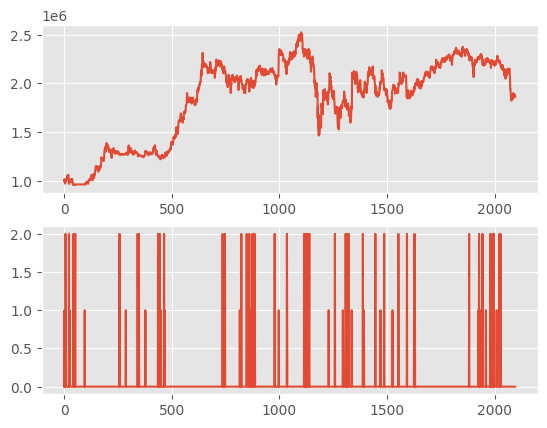

In [ ]:
plt.subplot(2,1,1)
plt.plot(df.net_worth)
plt.subplot(2,1,2)
plt.plot(actions)

# Buy and Hold Strategy

In [ ]:
portfolio2 = Portfolio(THB, [Wallet(set_market, 1_000_000 * THB),
                            Wallet(set_market, 0 * AOT)])
env2 = default.create(
        portfolio=portfolio2, # start with our portfolio
        action_scheme=default.actions.SimpleOrders(trade_sizes=[1]), # all in or out
        reward_scheme=default.rewards.SimpleProfit(), # simple profit (to be used later)
        feed=feed, # data feed for historical price
        window_size=1, # historical data that we need
        min_periods=hist_len # starting trading location
        )


In [ ]:
done = False
obs = env2.reset()
cnt = 0
actions = []
action = 1
while not done:
  actions.append(action)
  obs, reward, done, info = env2.step(action)
  action = 0
portfolio2.ledger.as_frame().head(7)

,poid,step,source,target,memo,amount,free,locked,locked_poid
0,cd43ab19-2e16-43cd-abdf-98165c5fbbce,1,set:THB/free,set:THB/locked,LOCK (LOCK FOR ORDER),1000000.00 THB,0.00 THB,1000000.00 THB,1000000.00 THB
1,cd43ab19-2e16-43cd-abdf-98165c5fbbce,1,set:THB/locked,set,WITHDRAWAL (COMMISSION),100.00 THB,0.00 THB,999900.00 THB,999900.00 THB
2,cd43ab19-2e16-43cd-abdf-98165c5fbbce,1,set:THB/locked,set,WITHDRAWAL (FILL ORDER),999900.00 THB,0.00 THB,0.00 THB,0.00 THB
3,cd43ab19-2e16-43cd-abdf-98165c5fbbce,1,set,set:AOT/locked,DEPOSIT (TRADED 999900.00 THB set:THB/AOT @ 30...,33219.27 AOT,0.00 AOT,33219.27 AOT,33219.27 AOT
4,cd43ab19-2e16-43cd-abdf-98165c5fbbce,1,set:THB/locked,set:THB/free,UNLOCK THB (COMPLETED),0.00 THB,0.00 THB,0.00 THB,0.00 THB
5,cd43ab19-2e16-43cd-abdf-98165c5fbbce,1,set:AOT/locked,set:AOT/free,UNLOCK AOT (COMPLETED),33219.27 AOT,33219.27 AOT,0.00 AOT,0.00 AOT


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


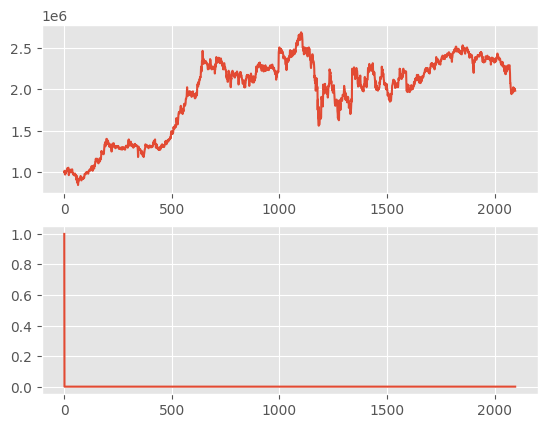

In [ ]:
df2 = pd.DataFrame(portfolio2.performance)
df2 = df2.T
plt.subplot(2,1,1)
plt.plot(df2.net_worth)
plt.subplot(2,1,2)
plt.plot(actions)

# comapring between two strategies

Text(0.5, 1.0, 'Gain (Loss) comparing to Buy and Hold')

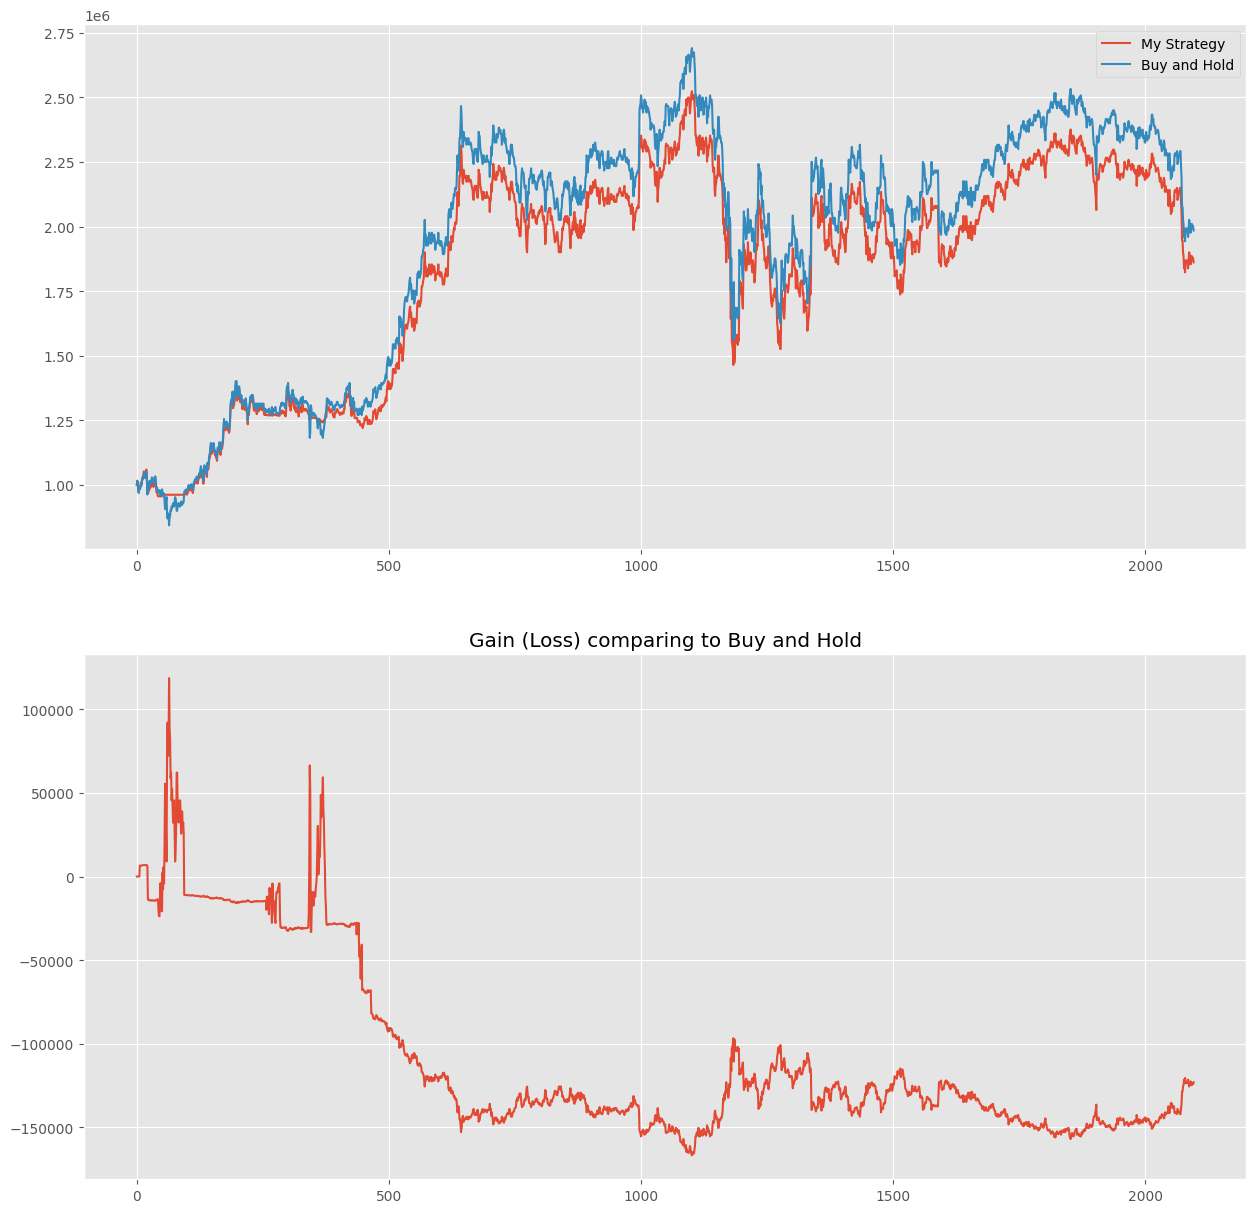

In [ ]:
plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
plt.plot(df.net_worth, label="My Strategy")
plt.plot(df2.net_worth, label="Buy and Hold")
plt.legend()
plt.subplot(2,1,2)
plt.plot(df.net_worth-df2.net_worth)
plt.title("Gain (Loss) comparing to Buy and Hold")
